In [1]:
import matplotlib.pyplot as plt
import rebound
import numpy as np
import timeit
import random 

In [2]:
def IAS15_sim(iteration):
    L0 = []
    dE = []
    dL = []
    t = []
    for x in range(iteration):
        #SET UP WITH AUTOMATIC TIMESTEPING
        sim = rebound.Simulation()
        sim.integrator = "ias15"
        tmax = 1.9e4*10
        
        sim.add(m=1.) #STAR
        sim.add(m=1.,a=1., omega = random.random()) #PLANET
        sim.add(m=1.,a=10.,inc=89.9, omega = random.random()) #PERTUBER
        
        #INITAL MEASUREMENTS 
        sim.move_to_com()
        E0 = sim.calculate_energy()
        L0_com = sim.calculate_angular_momentum()
        
        L0_temp = 0 
        for i in range(len(L0_com)):
            L0_temp += (L0_com[i])**2
        L0.append(np.sqrt(L0_temp))
        
        #INTEGRATE
        t0 = timeit.default_timer()
        sim.integrate(tmax)
        tf = timeit.default_timer()
        t.append(tf-t0)
        
        #FINAL MEASUREMENTS
        dE.append(abs((sim.calculate_energy() - E0)/E0))
        
        LF = sim.calculate_angular_momentum()
        LF_temp = 0 
        for i in range(len(LF)):
            LF_temp += (LF[i])**2
        dL.append((abs(np.sqrt(LF_temp) - L0[x])/L0[x]))
            
        #REMOVE SIM
        sim = 0
    return dE,dL,t

In [3]:
def whfast_sim(iteration):
    L0 = []
    dE = []
    dL = []
    t = []
    for x in range(iteration):
        #SET UP WITH 
        sim = rebound.Simulation()
        sim.integrator = "whfast"
        sim.ri_whfast.epsilon = 0
        sim.ri_whfast.safe_mode = 0
        sim.dt = 1e-3
        tmax = 1.9e4*10
        
        sim.add(m=1.) #STAR
        sim.add(m=1.,a=1., omega = random.random()) #PLANET
        sim.add(m=1.,a=10.,inc=89.9, omega = random.random()) #PERTUBER
        
        #INITAL MEASUREMENTS 
        sim.move_to_com()
        E0 = sim.calculate_energy()
        L0_com = sim.calculate_angular_momentum()
        
        L0_temp = 0 
        for i in range(len(L0_com)):
            L0_temp += (L0_com[i])**2
        L0.append(np.sqrt(L0_temp))
        
        #INTEGRATE
        t0 = timeit.default_timer()
        sim.integrate(tmax, exact_finish_time=0)
        tf = timeit.default_timer()
        t.append(tf-t0)
        
        #FINAL MEASUREMENTS
        dE.append(abs((sim.calculate_energy() - E0)/E0))
        
        LF = sim.calculate_angular_momentum()
        LF_temp = 0 
        for i in range(len(LF)):
            LF_temp += (LF[i])**2
        dL.append((abs(np.sqrt(LF_temp) - L0[x])/L0[x]))
            
        #REMOVE SIM
        sim = 0
    return dE,dL,t

In [4]:
def leapfrog_sim(iteration):
    L0 = []
    dE = []
    dL = []
    t = []
    for x in range(iteration):
        #SET UP WITH 
        sim = rebound.Simulation()
        sim.integrator = "leapfrog"
        sim.dt = 1e-3
        tmax = 1.9e4*10
        
        sim.add(m=1.) #STAR
        sim.add(m=1.,a=1., omega = random.random()) #PLANET
        sim.add(m=1.,a=10.,inc=89.9, omega = random.random()) #PERTUBER
        
        #INITAL MEASUREMENTS 
        sim.move_to_com()
        E0 = sim.calculate_energy()
        L0_com = sim.calculate_angular_momentum()
        
        L0_temp = 0 
        for i in range(len(L0_com)):
            L0_temp += (L0_com[i])**2
        L0.append(np.sqrt(L0_temp))
        
        #INTEGRATE
        t0 = timeit.default_timer()
        sim.integrate(tmax, exact_finish_time=0)
        tf = timeit.default_timer()
        t.append(tf-t0)
        
        #FINAL MEASUREMENTS
        dE.append(abs((sim.calculate_energy() - E0)/E0))
        
        LF = sim.calculate_angular_momentum()
        LF_temp = 0 
        for i in range(len(LF)):
            LF_temp += (LF[i])**2
        dL.append((abs(np.sqrt(LF_temp) - L0[x])/L0[x]))
            
        #REMOVE SIM
        sim = 0
    return dE,dL,t

In [5]:
def janus_sim(iteration):
    L0 = []
    dE = []
    dL = []
    t = []
    for x in range(iteration):
        #SET UP WITH 
        sim = rebound.Simulation()
        sim.integrator = "janus"
        sim.dt = 1e-3
        tmax = 1.9e4*10
        
        sim.add(m=1.) #STAR
        sim.add(m=1.,a=1., omega = random.random()) #PLANET
        sim.add(m=1.,a=10.,inc=89.9, omega = random.random()) #PERTUBER
        
        #INITAL MEASUREMENTS 
        sim.move_to_com()
        E0 = sim.calculate_energy()
        L0_com = sim.calculate_angular_momentum()
        
        L0_temp = 0 
        for i in range(len(L0_com)):
            L0_temp += (L0_com[i])**2
        L0.append(np.sqrt(L0_temp))
        
        #INTEGRATE
        t0 = timeit.default_timer()
        sim.integrate(tmax, exact_finish_time=0)
        tf = timeit.default_timer()
        t.append(tf-t0)
        
        #FINAL MEASUREMENTS
        dE.append(abs((sim.calculate_energy() - E0)/E0))
        
        LF = sim.calculate_angular_momentum()
        LF_temp = 0 
        for i in range(len(LF)):
            LF_temp += (LF[i])**2
        dL.append((abs(np.sqrt(LF_temp) - L0[x])/L0[x]))
            
        #REMOVE SIM
        sim = 0
    return dE,dL,t

In [6]:
def saba_sim(iteration):
    L0 = []
    dE = []
    dL = []
    t = []
    for x in range(iteration):
        #SET UP WITH 
        sim = rebound.Simulation()
        sim.integrator = "SABA(10,6,4)"
        sim.ri_saba.safe_mode = 0
        sim.dt = 1e-3
        tmax = 1.9e4*10
        
        sim.add(m=1.) #STAR
        sim.add(m=1.,a=1., omega = random.random()) #PLANET
        sim.add(m=1.,a=10.,inc=89.9, omega = random.random()) #PERTUBER
        
        #INITAL MEASUREMENTS 
        sim.move_to_com()
        E0 = sim.calculate_energy()
        L0_com = sim.calculate_angular_momentum()
        
        L0_temp = 0 
        for i in range(len(L0_com)):
            L0_temp += (L0_com[i])**2
        L0.append(np.sqrt(L0_temp))
        
        #INTEGRATE
        t0 = timeit.default_timer()
        sim.integrate(tmax, exact_finish_time=0)
        tf = timeit.default_timer()
        t.append(tf-t0)
        
        #FINAL MEASUREMENTS
        dE.append(abs((sim.calculate_energy() - E0)/E0))
        
        LF = sim.calculate_angular_momentum()
        LF_temp = 0 
        for i in range(len(LF)):
            LF_temp += (LF[i])**2
        dL.append((abs(np.sqrt(LF_temp) - L0[x])/L0[x]))
            
        #REMOVE SIM
        print("here")
        sim = 0
    return dE,dL,t

In [7]:
def eos_sim(iteration):
    L0 = []
    dE = []
    dL = []
    t = []
    for x in range(iteration):
        #SET UP WITH 
        sim = rebound.Simulation()
        sim.integrator = "eos"
        sim.ri_eos.phi0 = "LF4"
        sim.ri_eos.phi1 = "LF4"
        sim.ri_eos.n = 2 
        sim.ri_eos.safe_mode = 0
        sim.dt = 1e-3
        tmax = 1.9e4*10
        
        sim.add(m=1.) #STAR
        sim.add(m=1.,a=1., omega = random.random()) #PLANET
        sim.add(m=1.,a=10.,inc=89.9, omega = random.random()) #PERTUBER
        
        #INITAL MEASUREMENTS 
        sim.move_to_com()
        E0 = sim.calculate_energy()
        L0_com = sim.calculate_angular_momentum()
        
        L0_temp = 0 
        for i in range(len(L0_com)):
            L0_temp += (L0_com[i])**2
        L0.append(np.sqrt(L0_temp))
        
        #INTEGRATE
        t0 = timeit.default_timer()
        sim.integrate(tmax, exact_finish_time=0)
        tf = timeit.default_timer()
        t.append(tf-t0)
        
        #FINAL MEASUREMENTS
        dE.append(abs((sim.calculate_energy() - E0)/E0))
        
        LF = sim.calculate_angular_momentum()
        LF_temp = 0 
        for i in range(len(LF)):
            LF_temp += (LF[i])**2
        dL.append((abs(np.sqrt(LF_temp) - L0[x])/L0[x]))
            
        #REMOVE SIM
        sim = 0
    return dE,dL,t

In [8]:
dE1,dL1,t1 = IAS15_sim(10)
dE2,dL2,t2 = whfast_sim(10)
#dE3,dL3,t3 = leapfrog_sim(10)
#dE4,dL4,t4 = janus_sim(10)
dE5,dL5,t5 = saba_sim(10)
dE7,dL7,t7 = eos_sim(10)

here
here
here
here
here
here
here
here
here
here


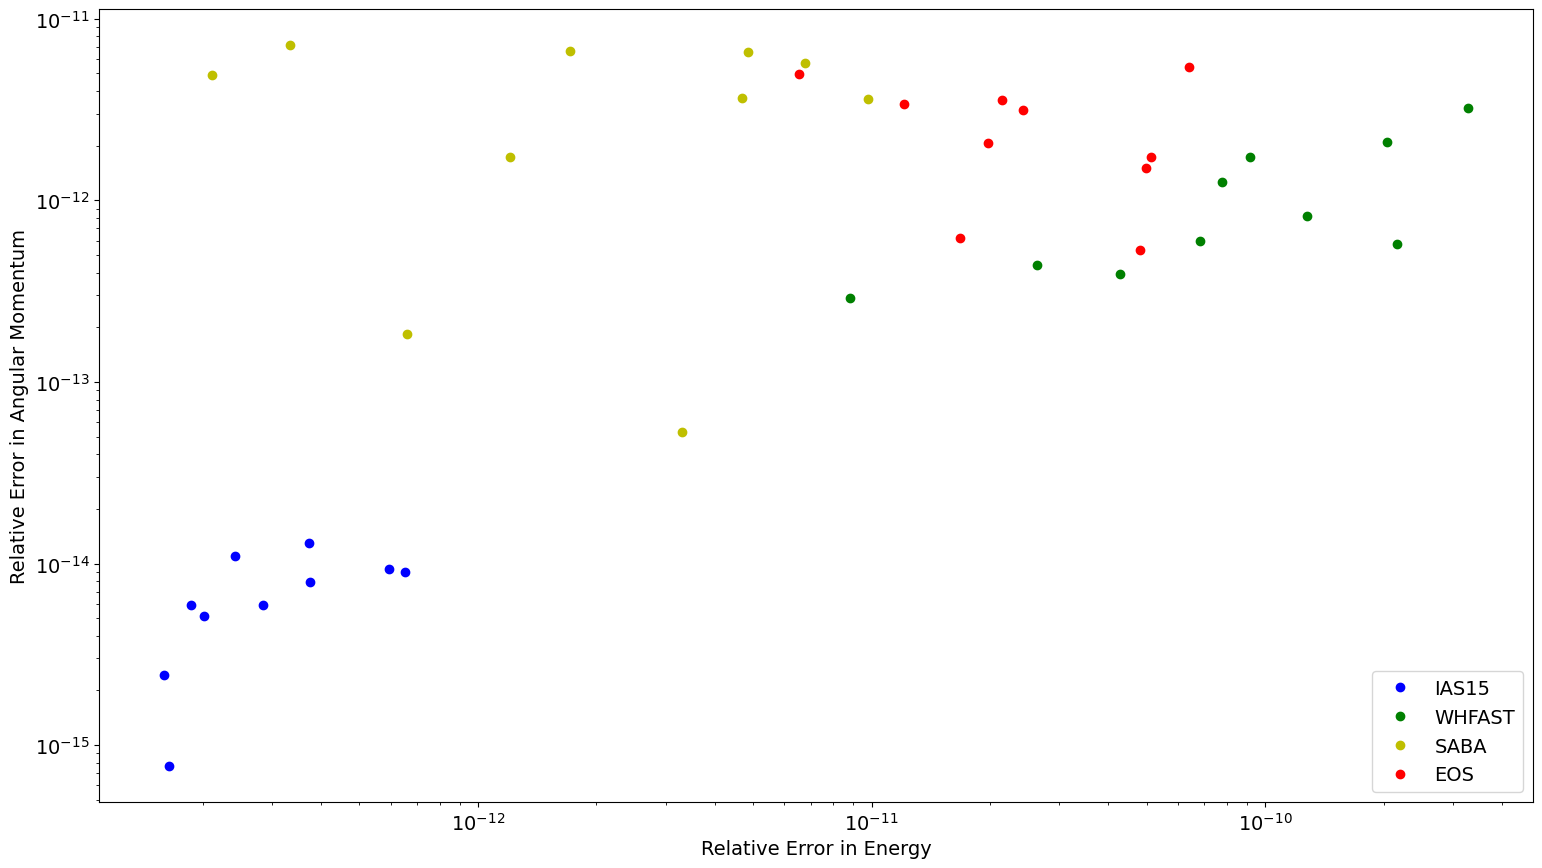

In [9]:
#PLOT ERRORS
plt.rcParams["font.size"] = 14
#plt.title("Relative Error in Energy vs Angular Momentum")
plt.xscale("log")
plt.xlabel("Relative Error in Energy")
plt.yscale("log")
plt.ylabel("Relative Error in Angular Momentum")
plt.plot(dE1,dL1,"bo", label = "IAS15")
plt.plot(dE2,dL2,"go", label = "WHFAST")
#plt.plot(dE3,dL3,"co", label = "LEAPFROG")
#plt.plot(dE4,dL4,"mo", label = "JANUS")
plt.plot(dE5,dL5,"yo", label = "SABA")
plt.plot(dE7,dL7,"ro", label = "EOS")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

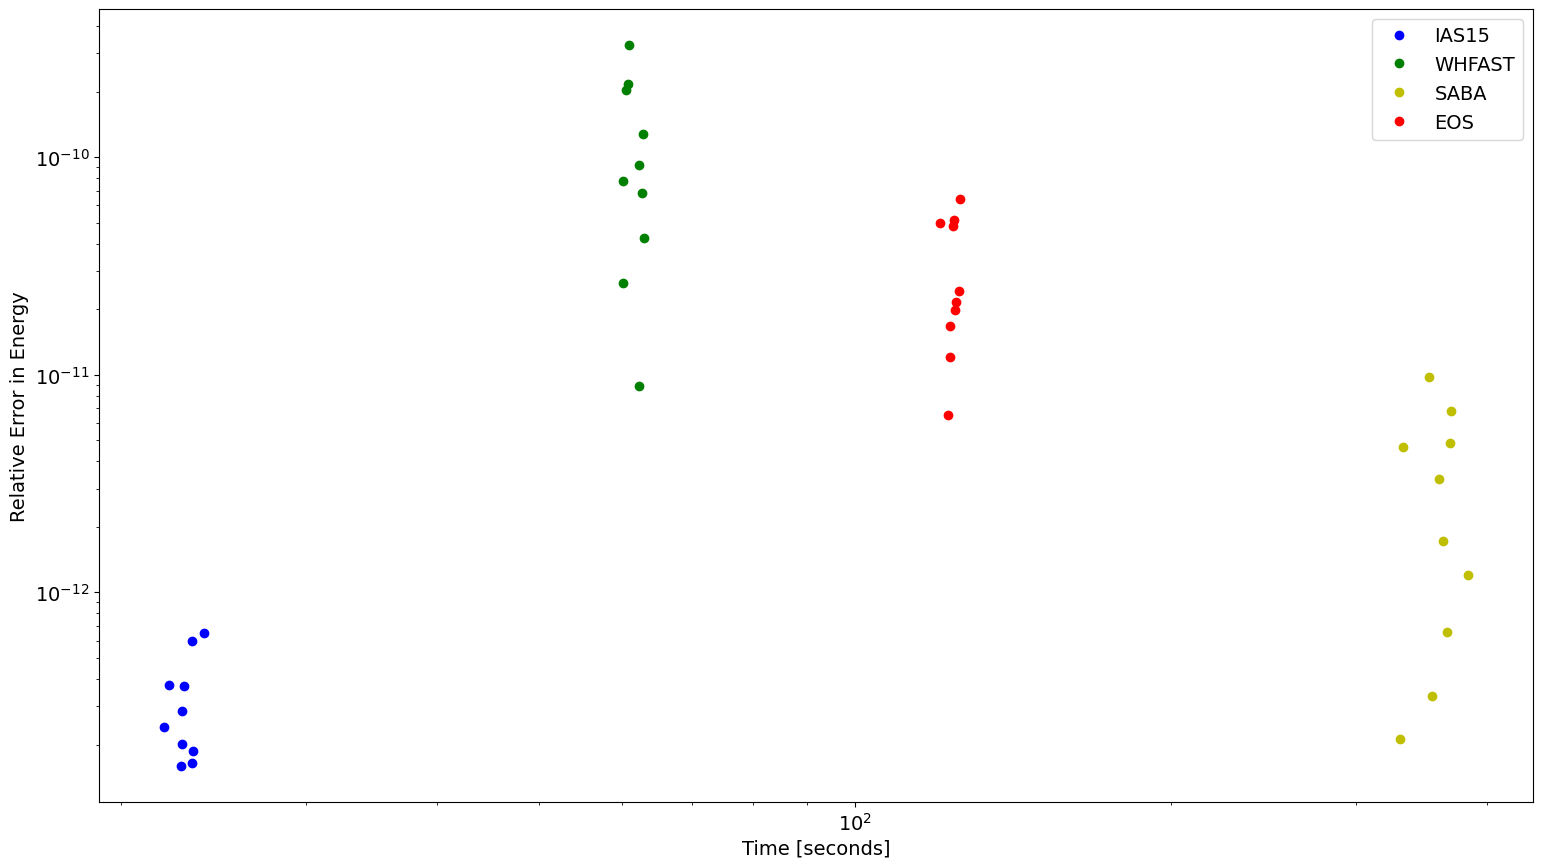

In [12]:
plt.rcParams["font.size"] = 14
#plt.title("CPU time vs Relative Error in Energy")
plt.xlabel("Time [seconds]")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Relative Error in Energy")
plt.plot(t1,dE1,"bo", label = "IAS15")
plt.plot(t2,dE2,"go", label = "WHFAST")
#plt.plot(t3,dE3,"co", label = "LEAPFROG")
#plt.plot(t4,dE4,"mo", label = "JANUS")
plt.plot(t5,dE5,"yo", label = "SABA")
plt.plot(t7,dE7,"ro", label = "EOS")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

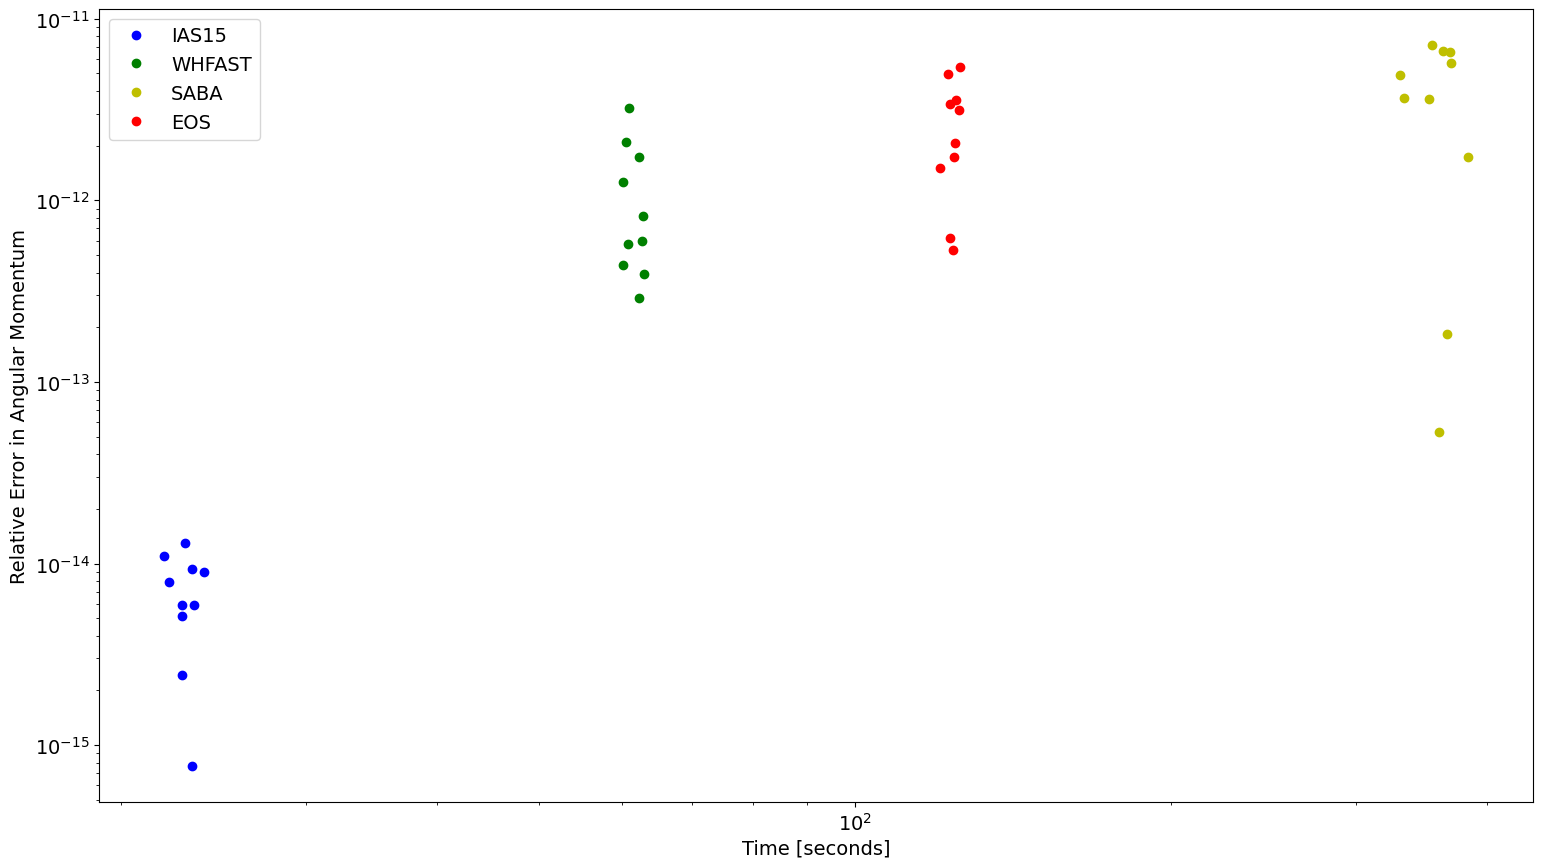

In [13]:
plt.rcParams["font.size"] = 14
#plt.title("CPU time vs Relative Error in Angular Momentum")
plt.xlabel("Time [seconds]")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Relative Error in Angular Momentum")
plt.plot(t1,dL1,"bo", label = "IAS15")
plt.plot(t2,dL2,"go", label = "WHFAST")
#plt.plot(t3,dL3,"co", label = "LEAPFROG")
#plt.plot(t4,dL4,"mo", label = "JANUS")
plt.plot(t5,dL5,"yo", label = "SABA")
plt.plot(t7,dL7,"ro", label = "EOS")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)